In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV as logCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score,auc
from scipy import stats

In [35]:
df_original = pd.read_csv('online_shoppers_intention.csv')
feature_names = df_original.columns.tolist()

Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

Administrative - 浏览行政网页数

Administrative_Duration - 浏览行政类网页总时长

Informational - 浏览信息类网页数

Informational_Duration - 浏览信息类网页总时长

ProductRelated - 浏览产品类网页数

ProductRelated_Duration - 浏览产品类网页总时长

BounceRates - 进入无交互百分比 (可能误点)

ExitRates - 特定页面退出百分比

PageValues - （待定）

SpecialDay - 浏览日离下一个节日的

***Month - 浏览行为发生的月份

OperatingSystems - 操作系统（8个类型）

Browser - 浏览器（13个类型）

Region - 地区（9个地区）

TrafficType - 卡顿情况（20种）

***VisitorType - 用户类型（三种）

***Weekend - 是否周末浏览

***Revenue - 是否完成购买

In [36]:
df_original.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [37]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [38]:
df_original.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [39]:
# Transfer All non-numi data into num.
# Month, VisitorType, Weekend, Revenue
# Data Missing January and April
df_all_num = df_original.copy()
month_to_code = {
    'January': 1,
    'Feb': 2,
    'Mar': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
VisitorType_to_code = {
    'Returning_Visitor': 1,
    'New_Visitor': 2,
    'Other': 3
}
# 使用map函数将月份列编码为1到12
df_all_num['Month'] = df_all_num['Month'].map(month_to_code)
df_all_num['VisitorType'] = df_all_num['VisitorType'].map(VisitorType_to_code)
df_all_num['Weekend'] = df_all_num['Weekend'].astype(int)
df_all_num['Revenue'] = df_all_num['Revenue'].astype(int)

In [40]:
df_all_num.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


In [41]:
abnormal_rows = df_all_num[((df_all_num['Administrative'] == 0) & (df_all_num["Administrative_Duration"] != 0))\
                           |((df_all_num['Administrative'] != 0) & (df_all_num["Administrative_Duration"] == 0))\
                            |((df_all_num['Informational'] == 0) & (df_all_num["Informational_Duration"] != 0))\
                                |((df_all_num['Informational'] != 0) & (df_all_num["Informational_Duration"] == 0))\
                                    |((df_all_num['ProductRelated'] == 0) & (df_all_num["ProductRelated_Duration"] != 0))\
                                        |((df_all_num['ProductRelated'] != 0) & (df_all_num["ProductRelated_Duration"] == 0))]

In [42]:
abnormal_rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,1,0,0
2,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,1,0,0
6,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,1,0,0
7,1,0.0,0,0.00,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,1,1,0
16,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,4,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12257,0,0.0,1,0.00,22,812.300000,0.030849,0.057391,0.0,0.0,11,1,1,4,10,1,1,0
12301,0,0.0,0,0.00,2,0.000000,0.200000,0.200000,0.0,0.0,11,1,1,4,1,1,0,0
12311,1,0.0,2,211.25,144,4627.489571,0.001361,0.020664,0.0,0.0,11,2,2,1,2,1,0,1
12321,0,0.0,0,0.00,6,0.000000,0.200000,0.200000,0.0,0.0,11,1,8,4,1,1,0,0


In [43]:
df_num_cleaned = df_all_num.copy()
df_num_cleaned = df_all_num.drop(abnormal_rows.index)

In [44]:
df_num_cleaned.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,1,0,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,1,0,0


In [45]:
# create new columns
df_enriched = df_num_cleaned.copy()

page = ['Administrative','Informational','ProductRelated']
for i in range(3):
    df_enriched[f'{page[i]}_Browsingdepth'] = df_enriched[f'{page[i]}'] / df_enriched[f'{page[i]}_Duration']
    df_enriched[f'{page[i]}_Browsingdepth'].fillna(0,inplace=True)

# bring target value to the last column
target = df_enriched['Revenue']
df_enriched.drop(columns=['Revenue'], inplace=True)
df_enriched['Revenue'] = target

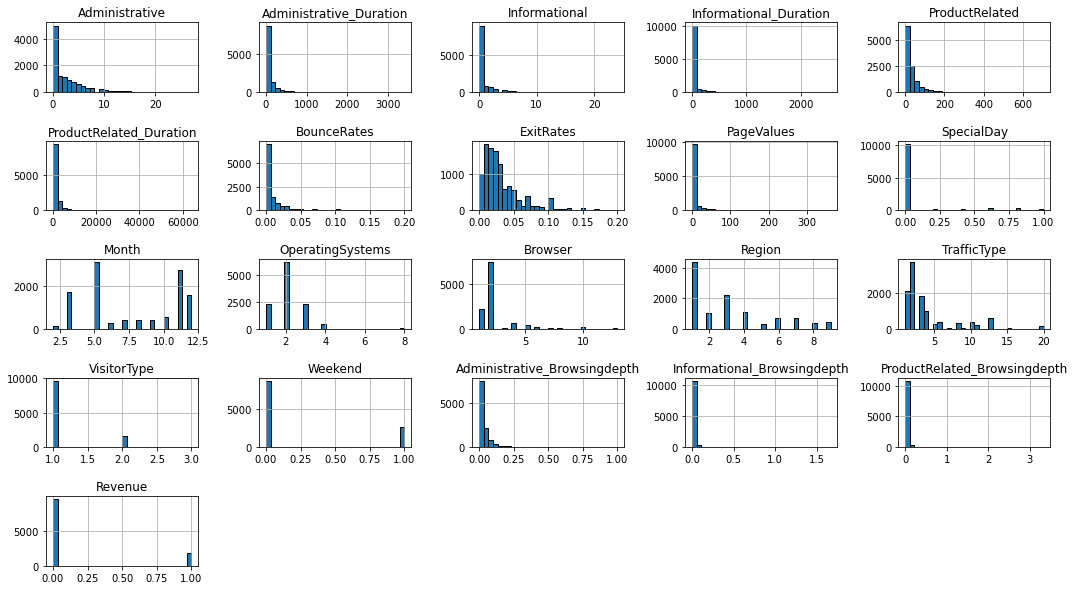

In [46]:
import matplotlib.pyplot as plt
df_enriched.hist(figsize=(18, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [47]:
df_enriched.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Administrative_Browsingdepth',
       'Informational_Browsingdepth', 'ProductRelated_Browsingdepth',
       'Revenue'],
      dtype='object')

In [48]:
Ordinal_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Administrative_Browsingdepth',
       'Informational_Browsingdepth', 'ProductRelated_Browsingdepth']

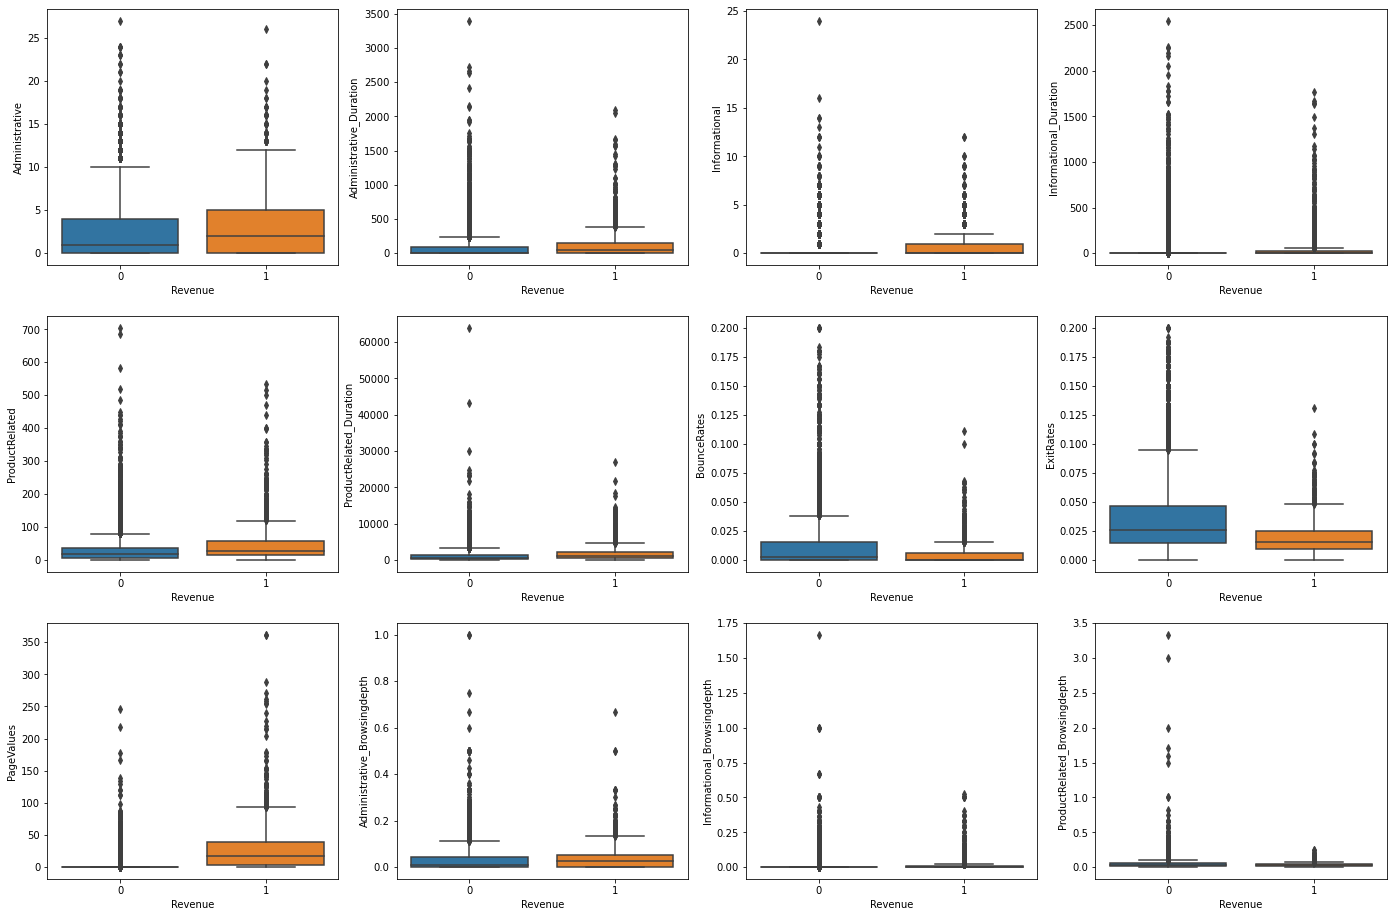

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 16))

# 遍历每个图，绘制箱形图
for i, column in enumerate(Ordinal_columns):
    row = i // 4  # 计算行索引
    col = i % 4   # 计算列索引
    sns.boxplot(x='Revenue', y=column, data=df_enriched, ax=axes[row, col])

plt.show()

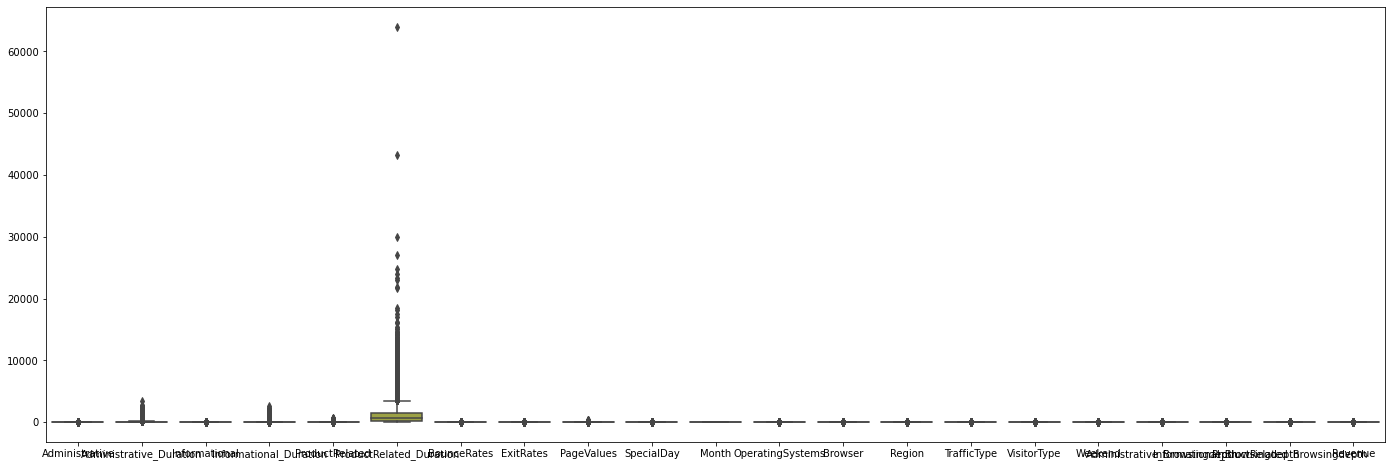

In [50]:
plt.figure(figsize=(24,8))
sns.boxplot(data=df_enriched)
plt.show()

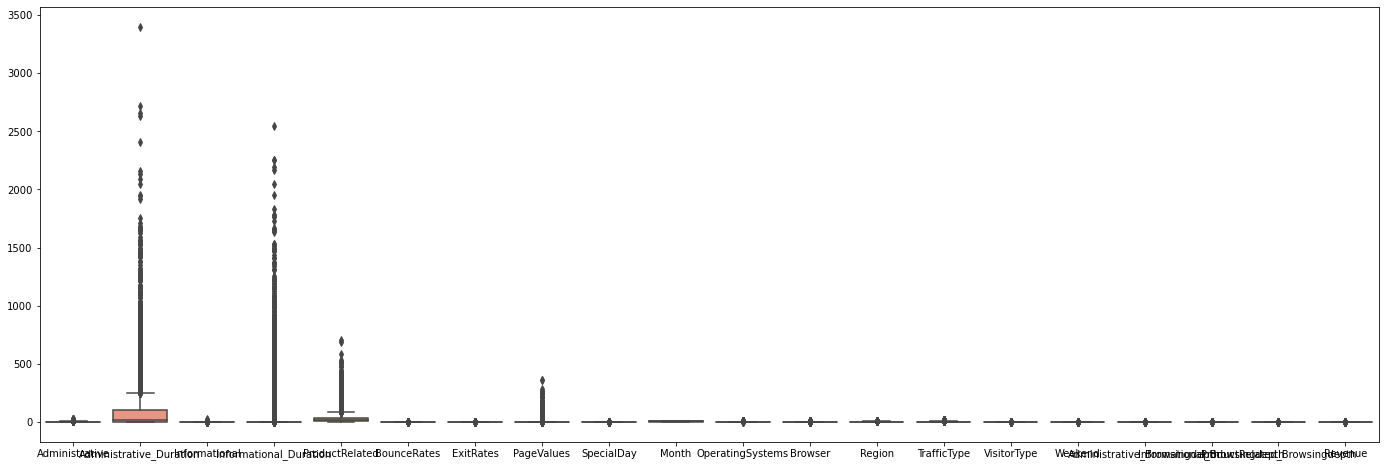

In [51]:
plt.figure(figsize=(24,8))
sns.boxplot(data=df_enriched.drop(columns="ProductRelated_Duration"))
plt.show()

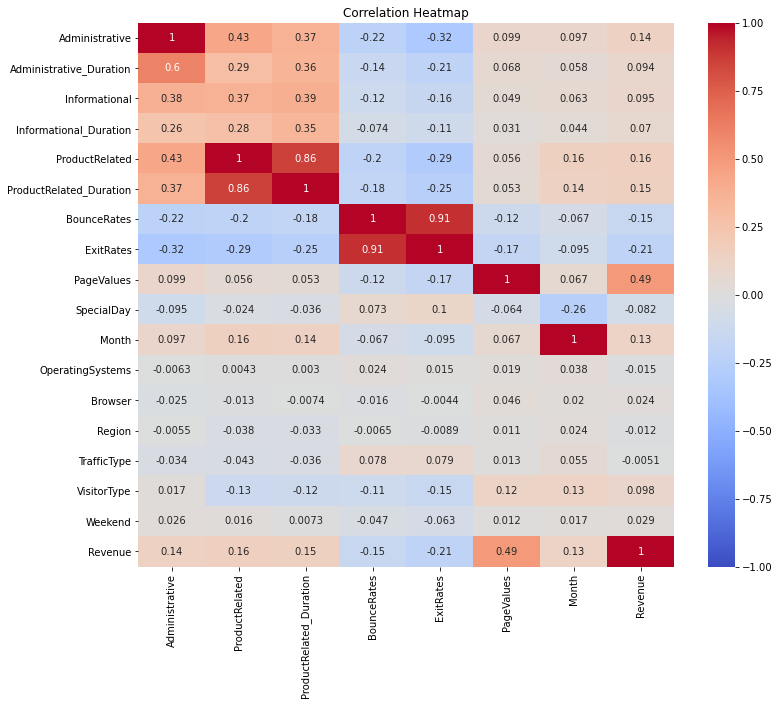

In [52]:
def heat_map(df, correlation_threshold = 0.1):
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 10))
    columns_to_drop = corr_matrix.columns[corr_matrix['Revenue'].abs() < correlation_threshold]
    corr_matrix = corr_matrix.drop(columns=columns_to_drop)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Heatmap")
    plt.show()
def log_transform(x):
    if pd.api.types.is_numeric_dtype(x):
        return np.log(x)
    return x
# log transformation
df_log_transformed = df_enriched.applymap(log_transform)
heat_map(df_all_num, 0.1)

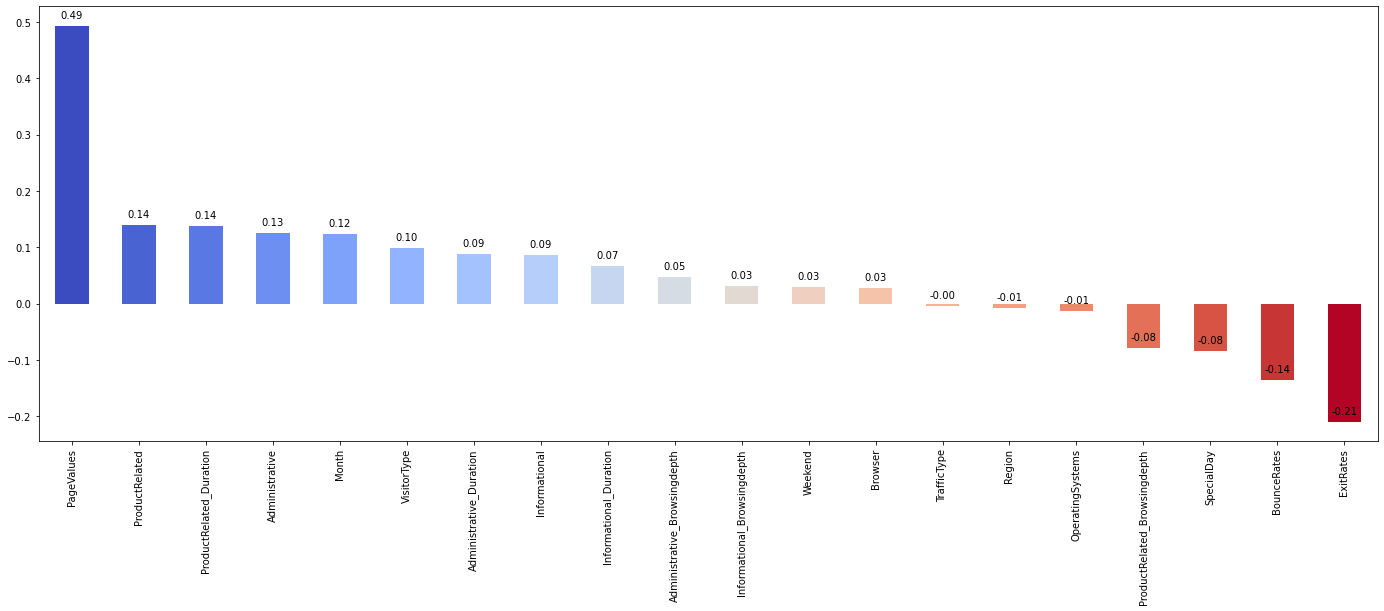

In [53]:
plt.figure(figsize=(24,8))
correlations = df_enriched.drop(columns="Revenue").corrwith(df_enriched['Revenue']).sort_values(ascending=False)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(x) for x in np.linspace(0, 1, len(correlations))]
bars = correlations.plot(kind='bar', color = colors)
# 标记correlation值
for i, v in enumerate(correlations):
    bars.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
plt.show()

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

target_vari_name = feature_names[-1]
formula = target_vari_name + ' ~ '
for feat_name in feature_names[:-1]:
    formula += feat_name + ' + '
formula = formula[:-3]
print('\n' + '*' * 80 + '\n')
df_anova = df_enriched.copy()
model = ols(formula, data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


********************************************************************************

                              sum_sq       df            F        PR(>F)
Administrative              0.205543      1.0     2.085835  1.486988e-01
Administrative_Duration     0.027840      1.0     0.282515  5.950682e-01
Informational               0.056841      1.0     0.576821  4.475771e-01
Informational_Duration      0.053734      1.0     0.545292  4.602631e-01
ProductRelated              0.302475      1.0     3.069496  7.980149e-02
ProductRelated_Duration     1.293197      1.0    13.123257  2.929376e-04
BounceRates                 0.072587      1.0     0.736608  3.907681e-01
ExitRates                   4.300006      1.0    43.636118  4.133233e-11
PageValues                310.453889      1.0  3150.461511  0.000000e+00
SpecialDay                  0.354355      1.0     3.595963  5.794568e-02
Month                       5.547785      1.0    56.298479  6.696017e-14
OperatingSystems            1.249837     

Modelling

In [55]:
df_final = df_enriched.copy()

In [56]:
df_final['Revenue'].value_counts()

0    9441
1    1820
Name: Revenue, dtype: int64

Deal with unbalanced data

In [57]:
X = df_final.drop('Revenue', axis=1) 
y = df_final['Revenue'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

print(X_train.shape)
print(X_test.shape)

(9008, 20)
(2253, 20)


In [58]:
# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train,y_train)
prediction1=model1.predict(X_test)
print('Accuracy for model1 lr is ',metrics.accuracy_score(prediction1,y_test))
print('precision',precision_score(y_test, prediction1, average='binary'))
print('recall',recall_score(y_test, prediction1, average='binary'))
print('f1_score',f1_score(y_test, prediction1, average='binary'))
print('\n')

model2 = LogisticRegression(class_weight='balanced') #Assign weights to different categories
model2.fit(X_train,y_train)
prediction2=model2.predict(X_test)
print('Accuracy for model2 lr is ',metrics.accuracy_score(prediction2,y_test))
print('precision',precision_score(y_test, prediction2, average='binary'))
print('recall',recall_score(y_test, prediction2, average='binary'))
print('f1_score',f1_score(y_test, prediction2, average='binary'))

Accuracy for model1 lr is  0.8823790501553485
precision 0.7461139896373057
recall 0.4
f1_score 0.5207956600361665


Accuracy for model2 lr is  0.8628495339547271
precision 0.553014553014553
recall 0.7388888888888889
f1_score 0.6325802615933414


/Users/emma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

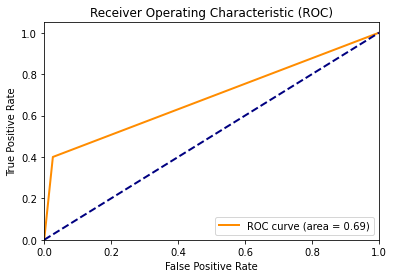

In [59]:
# 计算ROC曲线和AUC
fpr, tpr, thresholds = roc_curve(y_test, prediction1)
roc_auc = auc(fpr, tpr)

# 绘制AUC-ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

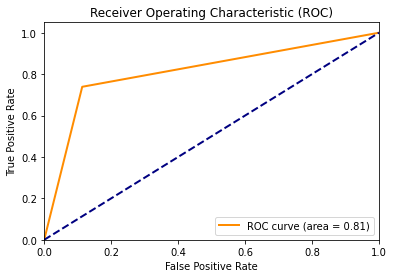

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, prediction2)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

In [61]:
# Randomforest
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)

In [62]:
print('Accuracy for model rf is ',metrics.accuracy_score(prediction_rf,y_test))
print('precision',precision_score(y_test, prediction_rf, average='binary'))
print('recall',recall_score(y_test, prediction_rf, average='binary'))
print('f1_score',f1_score(y_test, prediction_rf, average='binary'))

Accuracy for model rf is  0.8943630714602752
precision 0.7103448275862069
recall 0.5722222222222222
f1_score 0.6338461538461537


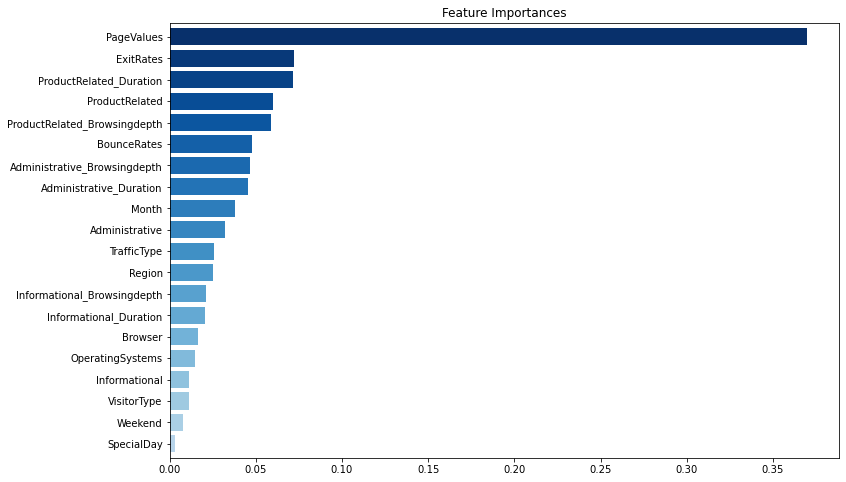

In [63]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=True)
colors = plt.cm.Blues(np.linspace(0.3, 1, len(sorted_importances)))

plt.figure(figsize= (12,8))
sorted_importances.plot(kind='barh', width=0.8, color=colors)
plt.title("Feature Importances")
plt.show()